In [7]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

In [8]:
input_file = '../Data_cached/glitch_data_L1.hdf5'

In [9]:
f = h5py.File(input_file, 'r')
f.keys()

<KeysViewHDF5 ['glitch_data', 'glitch_info']>

In [10]:
glitch_data = f['glitch_data']
glitch_info = f['glitch_info']

In [11]:
glitch_info[0][0][2]

131.17128993649226

In [12]:
glitch_data[0].shape

(24576,)

In [13]:
output_list = np.zeros((len(glitch_data),glitch_data.shape[1]))

In [14]:
output_list.shape

(693, 24576)

In [26]:
for i in range(len(glitch_data)):
    output_list[i] = glitch_data[i]

In [36]:
output_list

array([[ 0.56807276,  0.01912012, -0.95609589, ..., -0.15277286,
         0.40153243,  0.52313423],
       [ 0.16056122, -0.27659467,  0.04892411, ...,  0.31357245,
         0.04483752, -0.52679868],
       [ 0.20965154,  0.73166444,  0.1301148 , ..., -0.20196317,
        -0.60526285, -0.46201673],
       ...,
       [-0.79891951,  0.05781054,  0.12584041, ...,  0.4692768 ,
        -0.1876533 , -0.60469378],
       [-0.03319381,  0.35354328,  0.40771221, ...,  0.05546135,
        -0.64898229, -0.33887223],
       [ 1.04832627, -0.02385674, -0.84508665, ..., -0.32913534,
         0.60132289, -0.04144944]])

In [16]:
SNR_list = np.zeros(len(glitch_info))

In [17]:
for i in range(len(glitch_info)):
    SNR_list[i] = glitch_info[i][0][2]

In [18]:
SNR_list

array([1.31171290e+02, 9.13267411e+01, 1.64698254e+01, 1.64656434e+01,
       1.59052673e+01, 1.57576454e+01, 1.46991183e+01, 1.46065654e+01,
       1.39416244e+01, 1.39320707e+01, 1.39193473e+01, 1.35946940e+01,
       1.33625467e+01, 1.32541147e+01, 1.30859744e+01, 1.30372605e+01,
       1.29071618e+01, 1.26815313e+01, 1.26005242e+01, 1.24448442e+01,
       1.24235702e+01, 1.23421420e+01, 1.20855038e+01, 1.20271530e+01,
       1.19708248e+01, 1.17792936e+01, 1.17432327e+01, 1.15963930e+01,
       1.15597534e+01, 1.14938637e+01, 1.14534705e+01, 1.13832266e+01,
       1.13810403e+01, 1.09327024e+01, 1.08377675e+01, 1.07682481e+01,
       1.07126837e+01, 1.06867916e+01, 1.04261920e+01, 1.02588975e+01,
       1.02344754e+01, 1.02145302e+01, 1.01006595e+01, 1.00365880e+01,
       9.89166391e+00, 9.79479352e+00, 9.78707380e+00, 9.63238832e+00,
       9.61509516e+00, 9.61075043e+00, 9.60644804e+00, 9.60271496e+00,
       9.60207754e+00, 9.59970294e+00, 9.59202710e+00, 9.59140287e+00,
      

In [42]:
np.savez('../Data_cached/glitch_data.npz', glitch_strain_data = output_list, glitch_SNR_data = SNR_list)

In [21]:
np.argwhere(SNR_list > 20).shape

(39, 1)

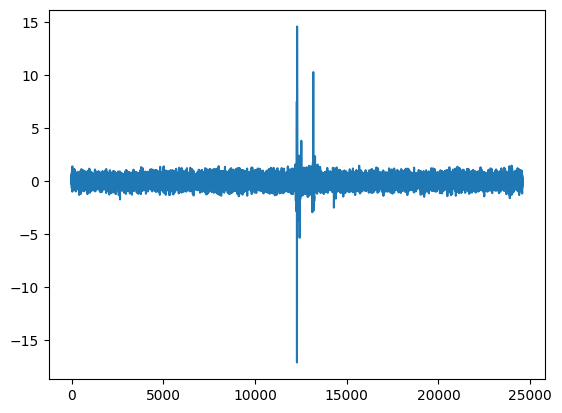

In [57]:
plt.plot(output_list[1])

In [27]:
glitch_data_100 = output_list[:, (3*4096-50):(3 * 4096 + 50)]

In [28]:
glitch_data_100.shape

(693, 100)

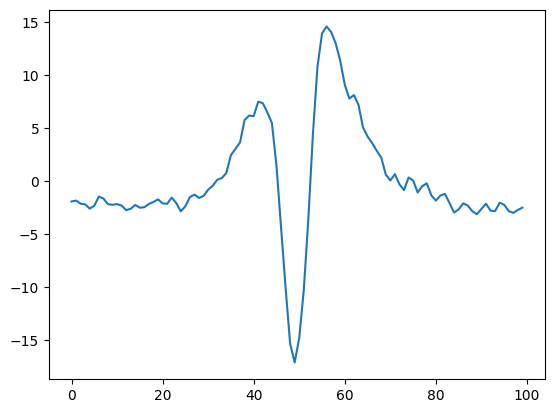

In [29]:
plt.plot(glitch_data_100[1])

In [58]:
np.save('../Data_cached/glitch_data_clean_25ms.npy', glitch_data_100)

(array([  0.,   0.,  15., 155., 186., 147., 120.,  29.,   5.,   0.,   2.,
          5.,   1.,   2.,   0.,   1.,   0.,   0.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19.]),
 <BarContainer object of 18 artists>)

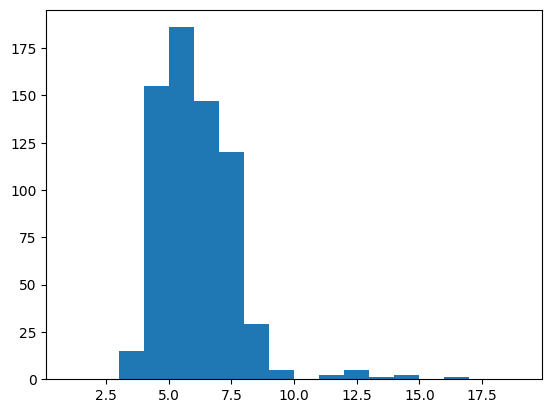

In [30]:
plt.hist(np.linalg.norm(glitch_data_100, axis = 1), bins = np.arange(1, 20, 1))

In [31]:
np.argwhere(np.linalg.norm(glitch_data_100, axis = 1) > 10).shape

(36, 1)

In [38]:
glitch_data_100_SNR_lt_10 = glitch_data_100[np.argwhere(np.linalg.norm(glitch_data_100, axis = 1) > 10)].reshape(36,100)

In [39]:
glitch_data_100_SNR_lt_10

array([[  -3.03800846,   -1.71464488,    3.58542663, ...,   -1.17649863,
          -0.97006881,   -1.12040401],
       [  -1.91913567,   -1.83114532,   -2.1180039 , ...,   -2.98951705,
          -2.71376295,   -2.4997635 ],
       [ 121.16911909,  124.24354365,  122.55275457, ...,   54.39330104,
          48.6763712 ,   46.9083376 ],
       ...,
       [-133.05379327, -153.05101499, -183.85132426, ..., -561.88415868,
        -534.42256023, -500.77051839],
       [  -5.38000835,  -12.66089229,  -18.98502389, ...,  -32.57398186,
         -33.82253194,  -36.11879695],
       [   2.26237987,    1.23387451,    2.39212887, ...,    1.52081075,
           1.76113989,    1.81940302]])

In [41]:
np.linalg.norm(glitch_data_100_SNR_lt_10[1])

54.20315301661551

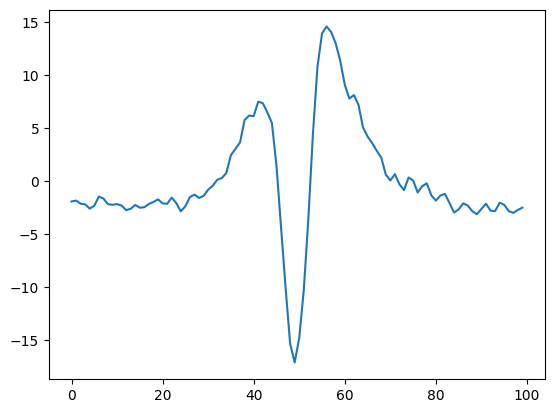

In [40]:
plt.plot(glitch_data_100_SNR_lt_10[1])

In [42]:
np.save('../Data_cached/glitch_data_highSNR_10_25ms.npy', glitch_data_100_SNR_lt_10)

In [51]:
glitch_data_100_noise = output_list[:, 0:(2 * 4096)]

In [52]:
noise_norm = np.linalg.norm(glitch_data_100_noise, axis = 1) * np.sqrt(100/(2 * 4096))

In [53]:
np.argmax(noise_norm)

104

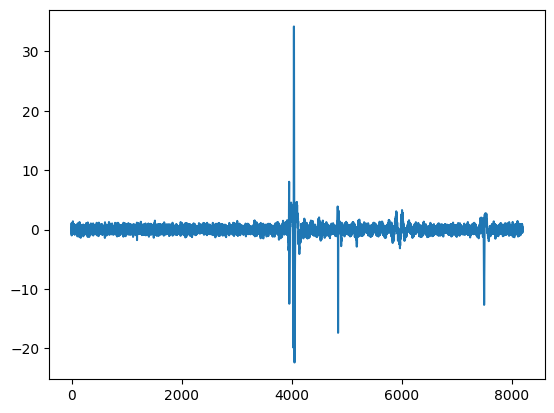

In [56]:
plt.plot(glitch_data_100_noise[104])

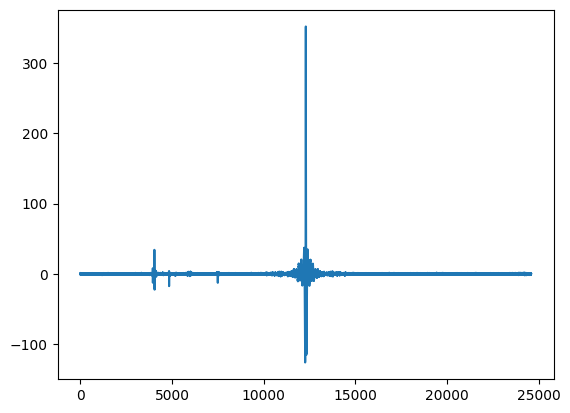

In [57]:
plt.plot(glitch_data[104])

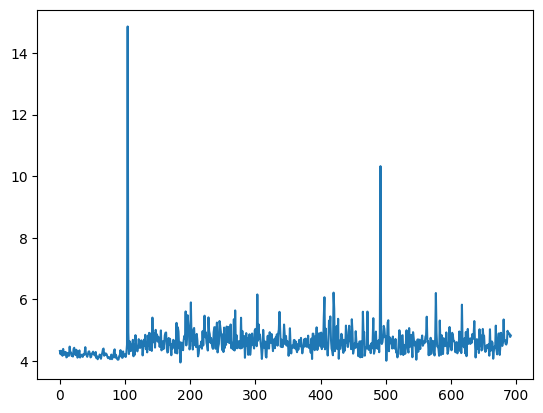

In [55]:
plt.plot(noise_norm)